In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

!pip install lightgbm
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
'''from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    plot_roc_curve,
)'''

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
#from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime

warnings.filterwarnings("ignore")

In [ ]:
churner = pd.read_excel("credit_card.xlsx")

In [ ]:
churner.shape

(20071, 21)

In [ ]:
churner.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Quarter,Year,Date_Leave
0,712672083,Existing Customer,65,F,0,High School,Married,Less than $40K,Blue,36,3,3,2,1438.300,747,691.300,24,0.519,none,2018,"none,2018"
1,713049933,Existing Customer,47,F,1,Graduate,Married,$40K - $60K,Silver,36,5,2,2,5756.000,0,5756.000,44,0.000,none,2018,"none,2018"
2,713049933,Existing Customer,48,F,1,Graduate,Married,$40K - $60K,Silver,48,5,6,2,5756.000,990,5756.000,25,0.170,none,2019,"none,2019"
3,713135883,Existing Customer,65,F,0,College,Married,Less than $40K,Blue,65,4,5,0,4315.000,393,3598.000,73,0.090,none,2019,"none,2019"
4,713135883,Existing Customer,64,F,0,College,Married,Less than $40K,Blue,53,4,3,0,4315.000,717,3598.000,51,0.166,none,2018,"none,2018"


In [ ]:
# Creating a copy dataset for analysis

data = churner.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 20071 non-null  int64  
 1   Attrition_Flag            20071 non-null  object 
 2   Customer_Age              20071 non-null  int64  
 3   Gender                    20071 non-null  object 
 4   Dependent_count           20071 non-null  int64  
 5   Education_Level           20071 non-null  object 
 6   Marital_Status            20071 non-null  object 
 7   Income_Category           20071 non-null  object 
 8   Card_Category             20071 non-null  object 
 9   Months_on_book            20071 non-null  int64  
 10  Total_Relationship_Count  20071 non-null  int64  
 11  Months_Inactive_12_mon    20071 non-null  int64  
 12  Contacts_Count_12_mon     20071 non-null  int64  
 13  Credit_Limit              20071 non-null  float64
 14  Total_

No Null values

In [ ]:
data.isnull().sum

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,20071.000,751079929.865,54720394.109,708082083.000,713485533.000,718843608.000,781013958.000,900203146.000
Customer_Age,20071.000,46.332,8.386,24.000,41.000,47.000,52.000,65.000
Dependent_count,20071.000,1.955,1.202,0.000,1.000,2.000,3.000,5.000
Months_on_book,20071.000,41.040,10.392,13.000,35.000,41.000,48.000,68.000
Total_Relationship_Count,20071.000,3.817,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,20071.000,2.665,1.613,0.000,1.000,3.000,3.000,6.000
Contacts_Count_12_mon,20071.000,2.449,1.104,0.000,2.000,2.000,3.000,6.000
Credit_Limit,20071.000,8637.126,9084.356,1400.000,2548.500,4532.000,11062.000,35000.000
Total_Revolving_Bal,20071.000,1011.000,658.145,0.000,521.000,1002.000,1418.500,12080.000
Avg_Open_To_Buy,20071.000,7480.057,9103.257,3.000,1312.500,3474.000,9904.000,34516.000


Unique values for Category columns

In [ ]:
data.select_dtypes(include="object").nunique()

Attrition_Flag      2
Gender              2
Education_Level     6
Marital_Status      3
Income_Category     5
Card_Category       4
Quarter             5
Date_Leave         10
dtype: int64

In [ ]:
# let's view the statistical summary of the categorical columns in the data
data.describe(include="object").T

,count,unique,top,freq
Attrition_Flag,20071,2,Existing Customer,17499
Gender,20071,2,F,10639
Education_Level,20071,6,Graduate,8944
Marital_Status,20071,3,Married,12292
Income_Category,20071,5,$40K - $60K,7668
Card_Category,20071,4,Blue,9994
Quarter,20071,5,none,17499
Date_Leave,20071,10,"none,2019",8999


In [ ]:
data.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_trans_ct,avg_utilization_ratio,quarter,year,date_leave
0,712672083,Existing Customer,65,F,0,High School,Married,Less than $40K,Blue,36,3,3,2,1438.300,747,691.300,24,0.519,none,2018,"none,2018"
1,713049933,Existing Customer,47,F,1,Graduate,Married,$40K - $60K,Silver,36,5,2,2,5756.000,0,5756.000,44,0.000,none,2018,"none,2018"
2,713049933,Existing Customer,48,F,1,Graduate,Married,$40K - $60K,Silver,48,5,6,2,5756.000,990,5756.000,25,0.170,none,2019,"none,2019"
3,713135883,Existing Customer,65,F,0,College,Married,Less than $40K,Blue,65,4,5,0,4315.000,393,3598.000,73,0.090,none,2019,"none,2019"
4,713135883,Existing Customer,64,F,0,College,Married,Less than $40K,Blue,53,4,3,0,4315.000,717,3598.000,51,0.166,none,2018,"none,2018"


In [ ]:
data['contacts_count_12_mon'].value_counts()


3    6680
2    6417
1    2991
4    2744
0     796
5     343
6     100
Name: contacts_count_12_mon, dtype: int64

In [ ]:
df_temp = pd.concat(
            [
                data['months_inactive_12_mon'].value_counts(),
                data['months_inactive_12_mon'].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
df_temp.columns = ["Count", "Percentage"]
print(df_temp)
print("-" * 90)


   Count  Percentage
3   5268      26.247
2   4751      23.671
1   3629      18.081
4   1800       8.968
5   1646       8.201
6   1522       7.583
0   1455       7.249
------------------------------------------------------------------------------------------


In [ ]:
def category_unique_value():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

category_unique_value()

Unique values and corresponding data counts for feature: attrition_flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer  17499      87.185
Attrited Customer   2572      12.815
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: gender
------------------------------------------------------------------------------------------
   Count  Percentage
F  10639      53.007
M   9432      46.993
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: education_level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        8944      44.562
College         5594      27.871
High School     4192      20.886
Uneducated       725       3.6

In [ ]:
data.columns = [i.replace(" ", "_").lower() for i in data.columns]


In [ ]:
def summary(data: pd.DataFrame, x: str):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)


    dict = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    df = pd.DataFrame(data=dict, index=["Value"])
    print(f"5 Point Summary of {x.capitalize()} Attribute:\n")
    print(tabulate(df, headers="keys", tablefmt="psql"))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace=0.6)
    sns.set_palette("Pastel1")

    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x=data[x], palette="Accent", split=True)
    plt.title(f"{x.capitalize()} Violinplot")

    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(data[x], color="purple")
    ax1.axvline(
        np.mean(data[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(data[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f"{x.capitalize()} Density Distribution")



    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(
        x=data[x], palette="cool", width=0.7, linewidth=0.6, showmeans=True
    )
    plt.title(f"{x.capitalize()} Boxplot")

    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f"{x.capitalize()} Cumulative Density Distribution")

    plt.show()

5 Point Summary of Avg_utilization_ratio Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 | 0.05 | 0.16 | 0.39 | 0.999 |
+-------+-------+------+------+------+-------+


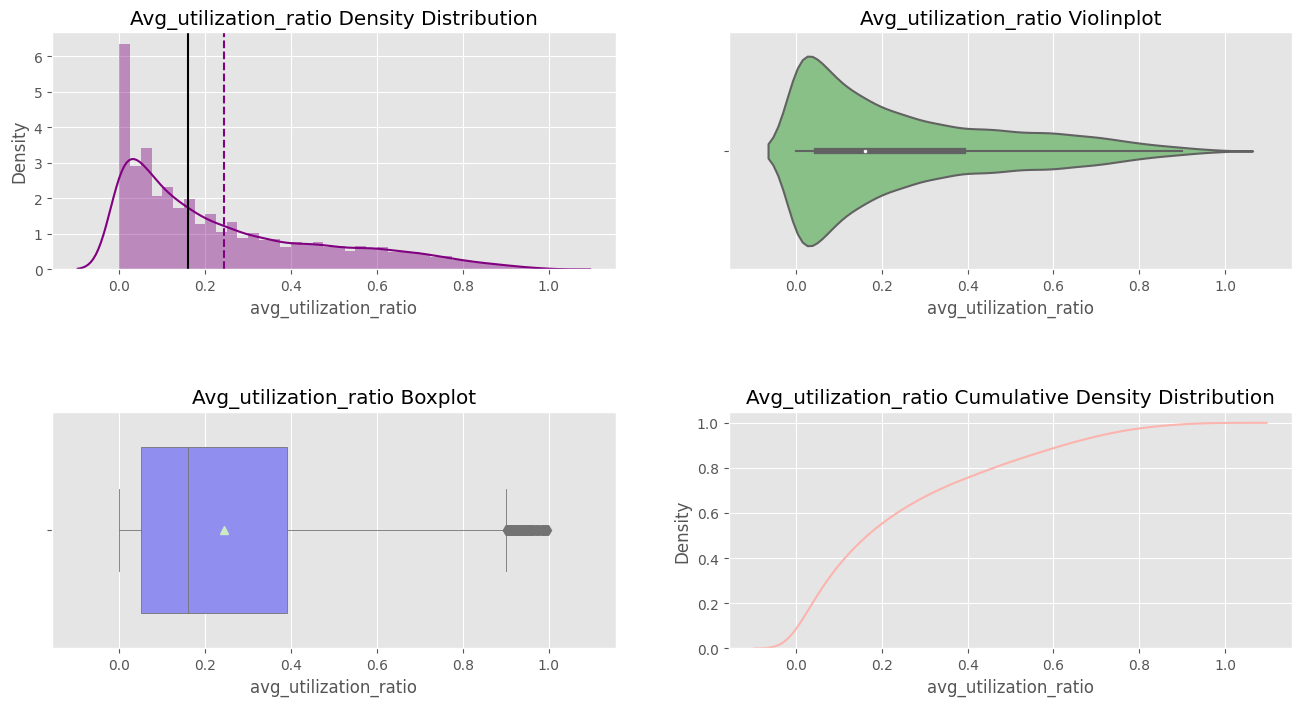

In [ ]:
summary(data, "avg_utilization_ratio")

In [ ]:
def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(df, ['age'], 'prodtaken')
    '''

    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(12,5*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

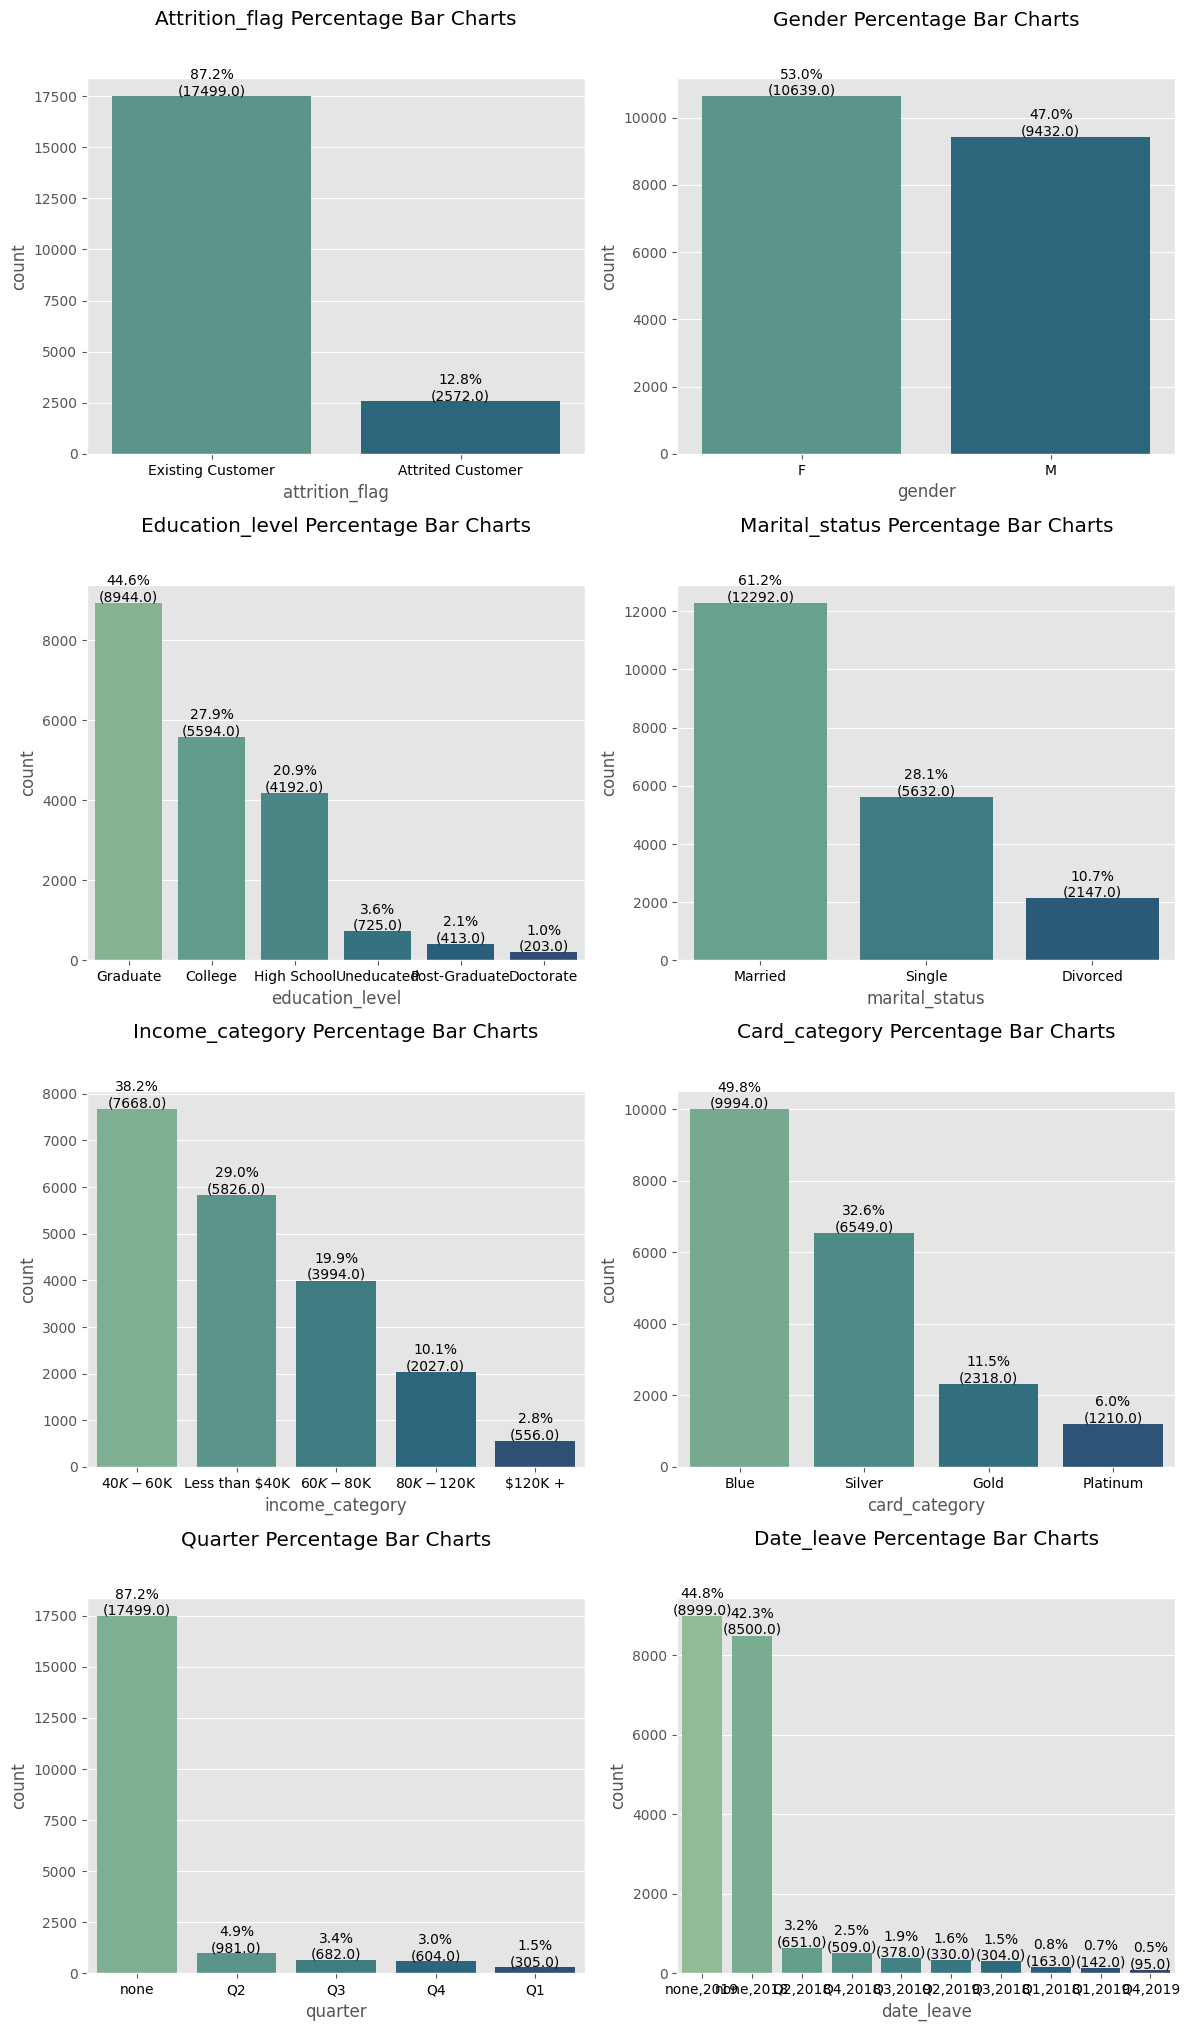

In [ ]:
category_columns = data.select_dtypes(include="category").columns.tolist()
target_variable = "attrition_flag"
perc_on_bar(data, category_columns, target_variable)

In [ ]:
a=data['card_category'].value_counts().groupby(data['attrition_flag']).sum()

In [ ]:
a=data.groupby(['card_category'])

In [ ]:
a

attrition_flag
Attrited Customer    0
Existing Customer    0
Name: card_category, dtype: int64

In [ ]:
result = data.groupby('card_category')['credit_limit'].mean()

In [ ]:
result

card_category
Blue        2641.872
Gold       21634.781
Platinum   34149.964
Silver      8471.828
Name: credit_limit, dtype: float64

In [ ]:
data.groupby('card_category')['quarter'].value_counts()

card_category  quarter
Blue           none       8626
               Q2          552
               Q3          357
               Q4          273
               Q1          186
Gold           none       2070
               Q2           82
               Q3           69
               Q4           67
               Q1           30
Platinum       none       1056
               Q2           66
               Q4           43
               Q3           34
               Q1           11
Silver         none       5747
               Q2          281
               Q3          222
               Q4          221
               Q1           78
Name: quarter, dtype: int64

In [ ]:
data.groupby('Income_Category')['Credit_Limit'].mean()

Income_Category
$120K +          32541.097
$40K - $60K       5161.829
$60K - $80K      11693.949
$80K - $120K     26856.356
Less than $40K    2495.456
Name: Credit_Limit, dtype: float64

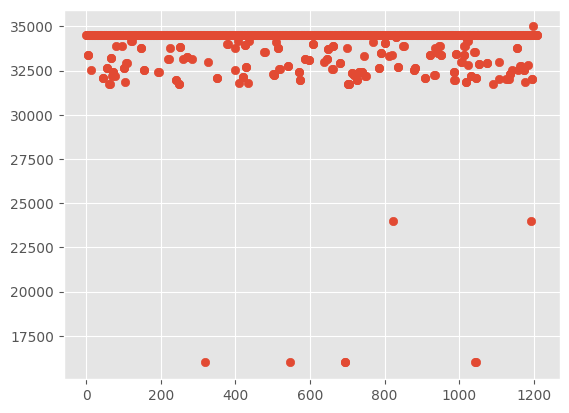

In [ ]:
ccc= data[data['Card_Category']=='Platinum']
plt.scatter(range(len(ccc)), ccc['Credit_Limit'])

In [ ]:
data.groupby('Gender')['Credit_Limit'].mean()

Gender
F    5068.886
M   12661.988
Name: Credit_Limit, dtype: float64

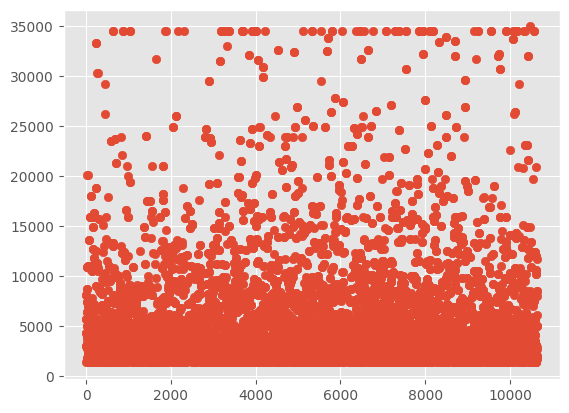

In [ ]:
ccc= data[data['Gender']=='F']
plt.scatter(range(len(ccc)), ccc['Credit_Limit'])

In [ ]:
c4= data[data['Credit_Limit']>25000]
c4['Gender'].value_counts()

M    1600
F     170
Name: Gender, dtype: int64

In [ ]:
data.groupby('Dependent_count')['Credit_Limit'].mean()

Dependent_count
0   11045.427
1    8391.654
2    7546.232
3    8893.255
4    9333.641
5   10539.046
Name: Credit_Limit, dtype: float64

In [ ]:
data.groupby('Education_Level')['Credit_Limit'].mean()

Education_Level
College          8097.837
Doctorate       30339.754
Graduate        10393.970
High School      3655.940
Post-Graduate   29635.734
Uneducated       1887.657
Name: Credit_Limit, dtype: float64

In [ ]:
data.groupby('Total_Relationship_Count')['Credit_Limit'].mean()

Total_Relationship_Count
1   10189.758
2   10341.892
3    8299.861
4    8200.227
5    7972.611
6    8296.889
Name: Credit_Limit, dtype: float64

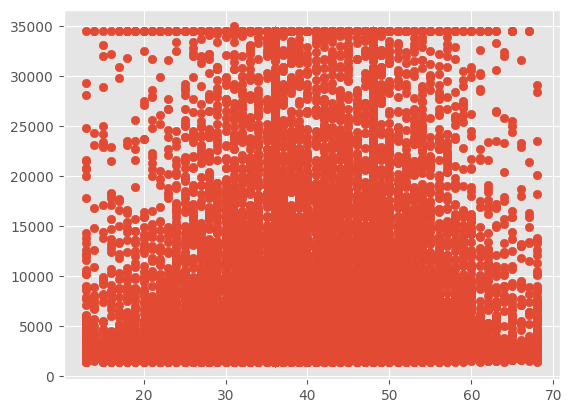

In [ ]:
plt.scatter(data['Months_on_book'], data['Credit_Limit'])

In [ ]:
bins = [0, 10, 20, 30,40,50,60,70]

# Use cut to assign each value in Column_A to a bin
data['Column_A_Binned'] = pd.cut(data['customer_age'], bins)

# Group by the bins in Column_A and calculate the mean of Column_B
grouped = data.groupby('Column_A_Binned')['credit_limit'].mean()

In [ ]:
grouped

Column_A_Binned
(0, 10]         NaN
(10, 20]        NaN
(20, 30]   6755.413
(30, 40]   8207.798
(40, 50]   9250.319
(50, 60]   8522.640
(60, 70]   6600.382
Name: credit_limit, dtype: float64

In [ ]:
Avg_Utilization_Ratio

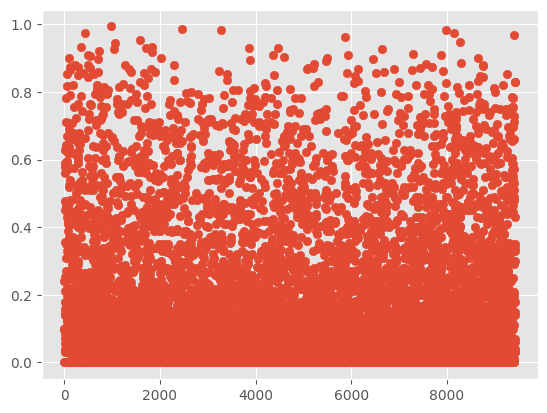

In [ ]:
ccc= data[data['Gender']=='M']
plt.scatter(range(len(ccc)), ccc['Avg_Utilization_Ratio'])

In [ ]:
c5= data[data['Avg_Utilization_Ratio']>0.75]
c5['Gender'].value_counts()

F    577
M    195
Name: Gender, dtype: int64

In [ ]:
data.groupby('Gender')['Avg_Utilization_Ratio'].mean()

Gender
F   0.304
M   0.176
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
aaa=data.groupby('Education_Level')['Avg_Utilization_Ratio'].mean()
aaa
# but post-graduate n doctorate also have high credit limit

Education_Level
College         0.229
Doctorate       0.036
Graduate        0.207
High School     0.347
Post-Graduate   0.038
Uneducated      0.397
Name: Avg_Utilization_Ratio, dtype: float64

<BarContainer object of 6 artists>

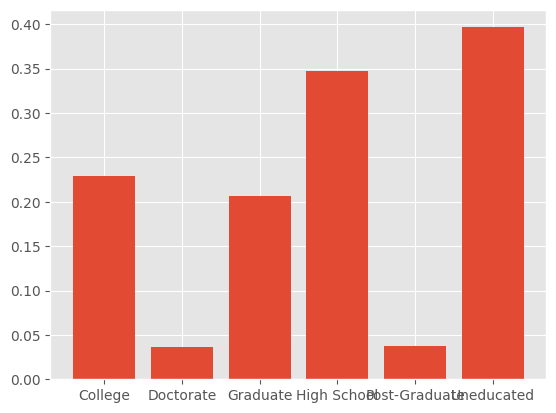

In [ ]:
plt.bar(aaa.index, aaa.values)

In [ ]:
data.groupby('Income_Category')['Avg_Utilization_Ratio'].mean()



Income_Category
$120K +          0.033
$40K - $60K      0.284
$60K - $80K      0.112
$80K - $120K     0.043
Less than $40K   0.372
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
data.groupby('Card_Category')['Avg_Utilization_Ratio'].mean()


Card_Category
Blue       0.384
Gold       0.050
Platinum   0.031
Silver     0.139
Name: Avg_Utilization_Ratio, dtype: float64

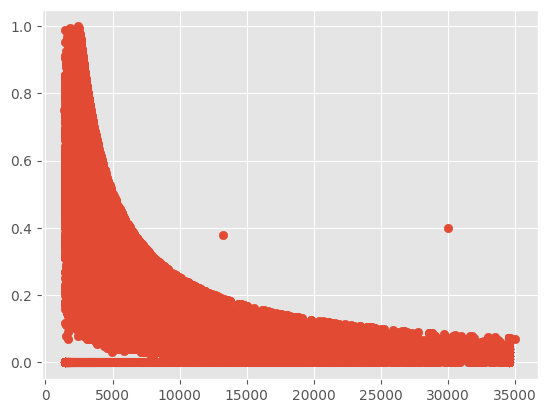

In [ ]:

plt.scatter(data['Credit_Limit'], data['Avg_Utilization_Ratio'])

In [ ]:
data.groupby('card_category')['quarter'].value_counts()
data.groupby('Card_Category')['Avg_Utilization_Ratio'].mean()


In [ ]:
data.groupby('Quarter')['Avg_Utilization_Ratio'].mean()

Quarter
Q1     0.205
Q2     0.187
Q3     0.196
Q4     0.149
none   0.253
Name: Avg_Utilization_Ratio, dtype: float64

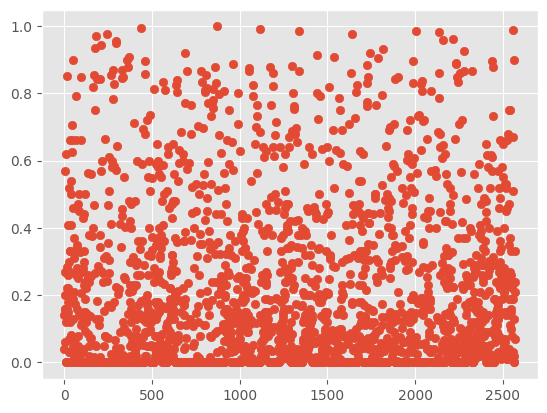

In [ ]:
c6= data[data['Attrition_Flag']=='Attrited Customer']
plt.scatter(range(len(c6)), c6['Avg_Utilization_Ratio'])

In [ ]:
data.groupby('Quarter')['Credit_Limit'].mean()

Quarter
Q1     6863.722
Q2     8046.639
Q3     7973.109
Q4     9148.253
none   8709.375
Name: Credit_Limit, dtype: float64

In [ ]:
data.groupby('Quarter')['Total_Trans_Ct'].mean()

Quarter
Q1     56.420
Q2     51.896
Q3     58.628
Q4     52.844
none   69.784
Name: Total_Trans_Ct, dtype: float64

In [ ]:
plt.scatter(range(len(y)), y)

In [ ]:
condition = 'Category_A'  # Change this to your specific condition

# Filter the DataFrame based on the condition
filtered_data = df[df['Categorical_Column'] == condition]

# Create a scatter plot
plt.scatter(range(len(filtered_data)), filtered_data['Numeric_Column'])

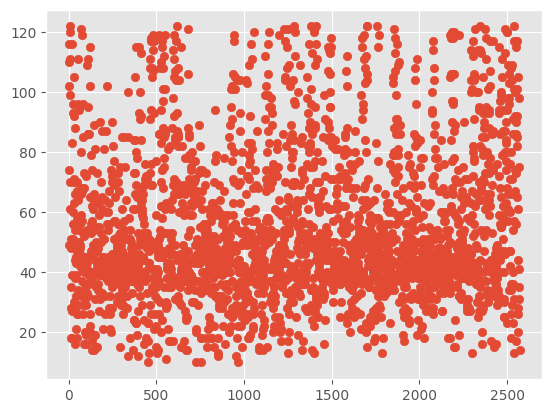

In [ ]:
cc= data[data['Attrition_Flag']=='Attrited Customer']
plt.scatter(range(len(cc)), cc['Total_Trans_Ct'])

In [ ]:
data.groupby('Months_Inactive_12_mon')['Attrition_Flag'].value_counts()

Months_Inactive_12_mon  Attrition_Flag   
0                       Existing Customer    1319
                        Attrited Customer     136
1                       Existing Customer    3372
                        Attrited Customer     257
2                       Existing Customer    4107
                        Attrited Customer     644
3                       Existing Customer    4314
                        Attrited Customer     954
4                       Existing Customer    1533
                        Attrited Customer     267
5                       Existing Customer    1471
                        Attrited Customer     175
6                       Existing Customer    1383
                        Attrited Customer     139
Name: Attrition_Flag, dtype: int64

In [ ]:
data.groupby('Total_Relationship_Count')['Attrition_Flag'].value_counts()

Total_Relationship_Count  Attrition_Flag   
1                         Existing Customer    1501
                          Attrited Customer     296
2                         Existing Customer    2018
                          Attrited Customer     426
3                         Existing Customer    3968
                          Attrited Customer     604
4                         Existing Customer    3360
                          Attrited Customer     435
5                         Existing Customer    3335
                          Attrited Customer     419
6                         Existing Customer    3317
                          Attrited Customer     392
Name: Attrition_Flag, dtype: int64